In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [15]:
df = pd.read_csv("C:/Users/swast/OneDrive/Desktop/codesoft intern/archive/churn prediction/spam.csv", encoding = "latin-1", usecols=["v1", "v2"])
df.columns = ["label", "message"]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [17]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


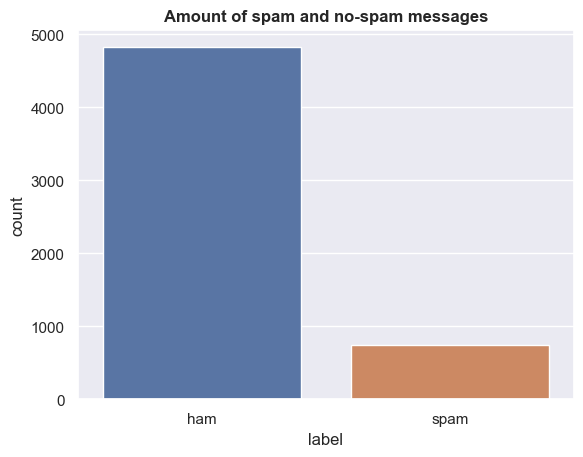

In [18]:
sns.set()
sns.countplot(data = df, x= df["label"]).set_title("Amount of spam and no-spam messages", fontweight = "bold")
plt.show()

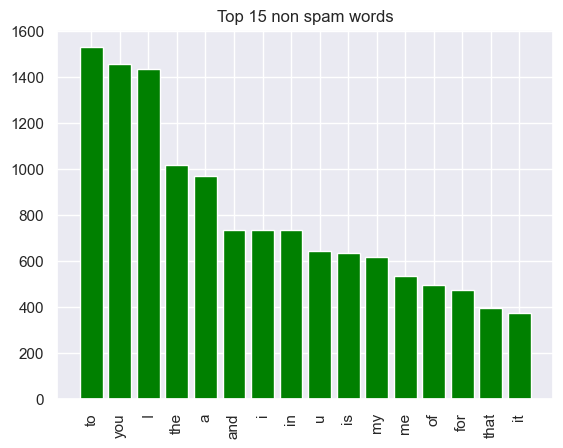

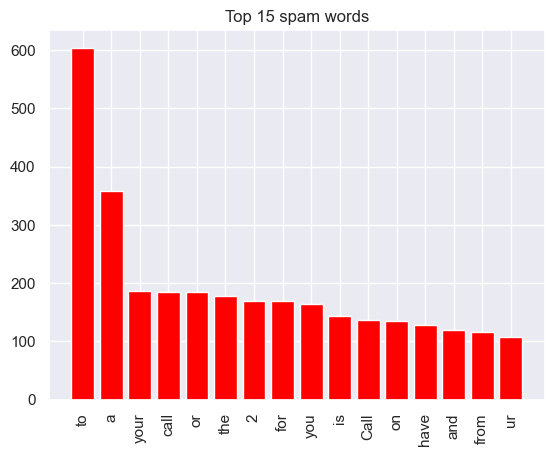

In [19]:
non_spam_messages = df[df["label"]=="ham"]["message"] 
l = [message.split() for message in non_spam_messages] 
no_spam_words = list(itertools.chain.from_iterable(l))

spam_messages = df[df["label"]=="spam"]["message"] 
k = [message.split() for message in spam_messages]
spam_words = list(itertools.chain.from_iterable(k))

non_spam = Counter(no_spam_words) 
spam = Counter(spam_words) 
non_spam = sorted(non_spam.items(), key=lambda kv: kv[1], reverse=True) 
spam = sorted(spam.items(), key=lambda kv: kv[1], reverse=True) 

top15_spam = spam[:16]
top15_nonspam = non_spam[:16]

top_words_nonspam = [i[0] for i in top15_nonspam]  
top_occurences_nonspam = [i[1] for i in top15_nonspam]

top_words_spam = [i[0] for i in top15_spam]       
top_occurences_spam = [i[1] for i in top15_spam]

plt.bar(top_words_nonspam, top_occurences_nonspam, color = 'green')
plt.title("Top 15 non spam words")
plt.xticks(rotation='vertical')
plt.show()

plt.bar(top_words_spam, top_occurences_spam, color = "red")
plt.title("Top 15 spam words")
plt.xticks(rotation='vertical')
plt.show()

In [20]:
X = df["message"]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)

cv = CountVectorizer(min_df = 0.01, max_df = 0.95, stop_words = 'english') 
cv.fit(X_train)

X_train = cv.transform(X_train)
X_test = cv.transform(X_test)
print(X_train)
print(X_test)

  (0, 41)	1
  (0, 78)	1
  (1, 15)	1
  (1, 29)	1
  (1, 33)	1
  (1, 48)	1
  (1, 70)	1
  (1, 72)	1
  (2, 20)	1
  (3, 8)	1
  (3, 20)	3
  (3, 48)	2
  (3, 78)	1
  (3, 100)	1
  (4, 24)	1
  (4, 29)	1
  (4, 57)	1
  (4, 71)	1
  (4, 75)	2
  (4, 78)	2
  (6, 8)	1
  (6, 75)	2
  (6, 95)	1
  (7, 22)	1
  (7, 53)	1
  :	:
  (4169, 81)	1
  (4170, 13)	2
  (4171, 17)	1
  (4171, 76)	1
  (4172, 41)	1
  (4172, 59)	1
  (4173, 63)	1
  (4174, 25)	1
  (4174, 45)	1
  (4175, 20)	3
  (4175, 51)	1
  (4175, 56)	1
  (4175, 61)	1
  (4175, 67)	1
  (4175, 92)	1
  (4176, 30)	1
  (4176, 35)	1
  (4176, 40)	1
  (4176, 67)	1
  (4176, 93)	1
  (4176, 103)	1
  (4177, 40)	1
  (4177, 42)	1
  (4177, 101)	1
  (4178, 77)	1
  (0, 9)	1
  (0, 33)	1
  (0, 36)	1
  (2, 10)	1
  (2, 72)	1
  (2, 81)	1
  (3, 14)	1
  (3, 48)	1
  (3, 87)	1
  (3, 93)	1
  (4, 41)	1
  (5, 17)	1
  (5, 39)	1
  (5, 44)	1
  (6, 20)	1
  (7, 28)	1
  (7, 35)	1
  (7, 55)	1
  (8, 21)	1
  (8, 28)	1
  (9, 20)	1
  (9, 67)	1
  (10, 22)	1
  (11, 4)	1
  (11, 13)	1
  :	:
  (1381, 74

In [21]:
model = MultinomialNB()
model.fit(X_train, y_train)

print(model.score(X_test, y_test))

0.9447236180904522


In [22]:
y_test_pred = model.predict(X_test)
confusion_matrix(y_test, y_test_pred)

array([[1168,   28],
       [  49,  148]], dtype=int64)

In [23]:
def classifier(message):
    
    transformed = cv.transform([message])
    prediction =  model.predict(transformed)
    
    if prediction == "ham":
        return "This message is no spam!"
    else:
        return "This message is spam!"
    
classifier("Free entry in 2 a wkly comp to win FA Cup fina...")

'This message is spam!'

In [24]:
print(len(cv.get_feature_names()))

print(len(X_train.A[0]))

104
104


c:\Users\swast\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [25]:
import joblib
joblib.dump(model, "model.pkl")
joblib.dump(cv, "vectorizer.pkl")
clf2 = joblib.load("model.pkl")

In [26]:
def classifier(message):
    
    transformed = cv.transform([message])
    prediction =  clf2.predict(transformed)
    
    if prediction == "ham":
        return "This message is no spam!"
    else:
        return "This message is spam!"
    
classifier("Free entry in 2 a wkly comp to win FA Cup fina...")

'This message is spam!'